In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
sns.set_theme(style='darkgrid', palette='autumn')

In [2]:
df_customer = pd.read_csv('Customer_clean.csv')
df_product = pd.read_csv('Product_clean.csv')
df_store = pd.read_csv('Store_clean.csv')
df_transaction = pd.read_csv('Transaction_clean.csv')

# EDA

## 1. Data Transaction

In [3]:
df_transaction.head()

,transactionid,customerid,Date,productid,price,qty,totalamount,storeid
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [4]:
print("Total Null : \n",df_transaction.isna().sum())
print("Total Data : ",df_transaction.shape)
print("Total Duplicated : ",df_transaction.duplicated().sum())
print(df_transaction.info())

Total Null : 
 transactionid    0
customerid       0
Date             0
productid        0
price            0
qty              0
totalamount      0
storeid          0
dtype: int64
Total Data :  (5020, 8)
Total Duplicated :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  5020 non-null   object
 1   customerid     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   productid      5020 non-null   object
 4   price          5020 non-null   int64 
 5   qty            5020 non-null   int64 
 6   totalamount    5020 non-null   int64 
 7   storeid        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB
None


### Handle Duplicated Data

In [5]:
# Check duplicated by transactionid
df_transaction.duplicated(subset='transactionid').sum()

112

In [6]:
df_transaction = df_transaction.drop_duplicates(subset='transactionid',keep='last')
print("Total Data : ",df_transaction.shape)

Total Data :  (4908, 8)


### Fix unmatched data types

("Date" : Object) to (timestamp)

In [7]:
df_transaction['Date'].dtype

dtype('O')

In [8]:
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

## 2. Data Customer

In [9]:
df_customer.head()

,customerid,age,gender,Marital Status,income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


In [10]:
print("Total Null : \n",df_customer.isna().sum())
print("Total Data : ",df_customer.shape)
print("Total Duplicated : ",df_customer.duplicated().sum())
df_customer.info()

Total Null : 
 customerid        0
age               0
gender            0
Marital Status    0
income            0
dtype: int64
Total Data :  (444, 5)
Total Duplicated :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerid      444 non-null    int64  
 1   age             444 non-null    int64  
 2   gender          444 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   income          444 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.5+ KB


## 3. Data Product

In [11]:
df_product.head()

,productid,Product Name,price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [12]:
print("Total Null : \n",df_customer.isna().sum())
print("Total Data : ",df_product.shape)
print("Total Duplicated : ",df_product.duplicated().sum())
df_product.info()

Total Null : 
 customerid        0
age               0
gender            0
Marital Status    0
income            0
dtype: int64
Total Data :  (10, 3)
Total Duplicated :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   productid     10 non-null     object
 1   Product Name  10 non-null     object
 2   price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


## 4. Data Store

In [13]:
df_store.head()

,storeid,storename,groupstore,Type,latitude,longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [14]:
print("Total Null : \n",df_store.isna().sum())
print("Total Data (Row,Col) : ",df_store.shape)
print("Total Duplicated : ",df_store.duplicated().sum())
df_store.info()

Total Null : 
 storeid       0
storename     0
groupstore    0
Type          0
latitude      0
longitude     0
dtype: int64
Total Data (Row,Col) :  (14, 6)
Total Duplicated :  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   storeid     14 non-null     int64  
 1   storename   14 non-null     object 
 2   groupstore  14 non-null     object 
 3   Type        14 non-null     object 
 4   latitude    14 non-null     float64
 5   longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


# Merge Data

In [15]:
df = df_transaction.copy()
df = df.merge(df_customer,how='left', on='customerid')
df = df.merge(df_product, how='left', on='productid')
df = df.merge(df_store, how='left', on='storeid')

# Delete duplicate column
df = df.drop(['price_y'], axis=1)

In [16]:
df.head()

,transactionid,customerid,Date,productid,price_x,qty,totalamount,storeid,age,gender,Marital Status,income,Product Name,storename,groupstore,Type,latitude,longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36.0,0.0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44.0,1.0,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27.0,1.0,Single,0.18,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48.0,1.0,Married,12.57,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33.0,0.0,Married,6.95,Yoghurt,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [17]:
df.isna().sum()

transactionid      0
customerid         0
Date               0
productid          0
price_x            0
qty                0
totalamount        0
storeid            0
age               44
gender            44
Marital Status    44
income            44
Product Name       0
storename          0
groupstore         0
Type               0
latitude           0
longitude          0
dtype: int64

# Preprocessing

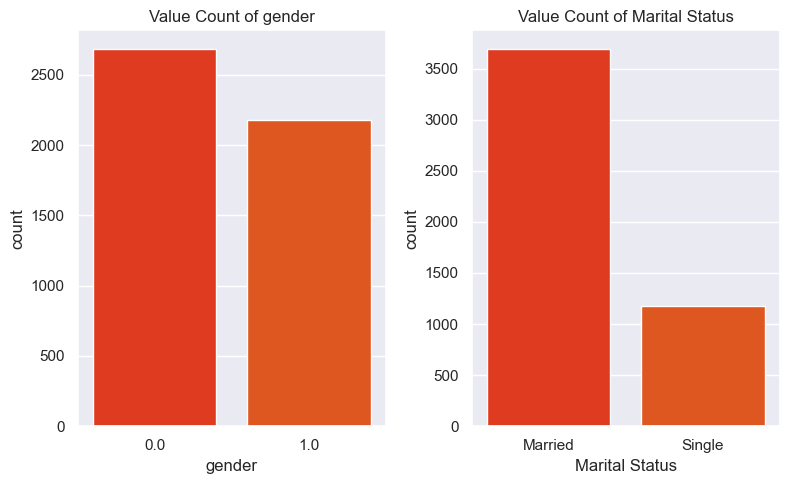

In [18]:
# Remove Missing Value
plt.figure(figsize=(12,5))
null_col = ['gender','Marital Status']
for i in range(len(null_col)):
    plt.subplot(1,3, i+1)
    sns.countplot(data=df, x=null_col[i])
    plt.title(f"Value Count of {null_col[i]}")
plt.tight_layout()

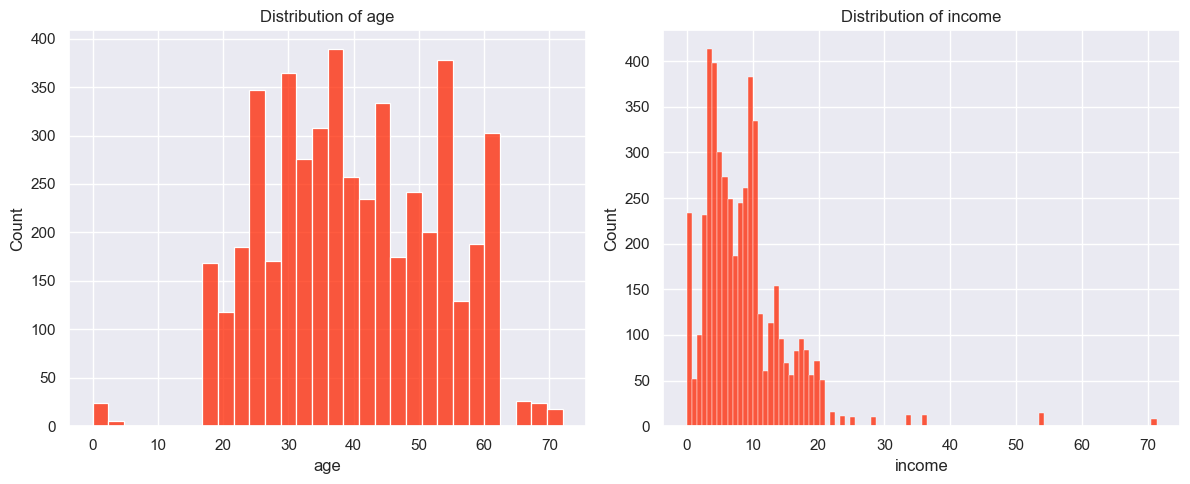

In [19]:
plt.figure(figsize=(18,5))
null_col = ['age','income']
for i in range(len(null_col)):
    plt.subplot(1,3, i+1)
    sns.histplot(data=df, x=null_col[i])
    plt.title(f"Distribution of {null_col[i]}")
plt.tight_layout()

In [20]:
df.fillna({'gender' : df['gender'].mode()[0], 'Marital Status':df['Marital Status'].mode()[0]}, inplace=True)

In [28]:
df.fillna({'age' : int(df['age'].mean()), 'income':df['income'].median()}, inplace=True)

In [29]:
df.isna().sum()

transactionid     0
customerid        0
Date              0
productid         0
price_x           0
qty               0
totalamount       0
storeid           0
age               0
gender            0
Marital Status    0
income            0
Product Name      0
storename         0
groupstore        0
Type              0
latitude          0
longitude         0
dtype: int64

# FORECASTING

## 1. Feature Selection for Modeling 1 (ARIMA)

In [30]:
df_forecasting = df.groupby(by='Date')[['qty']].sum()
df_forecasting.head()

,qty
Date,
2022-01-01,47
2022-01-02,45
2022-01-03,67
2022-01-04,98
2022-01-05,57


In [31]:
train = df_forecasting[:int(len(df_forecasting)*4/5)] 
test = df_forecasting[int(len(df_forecasting)*4/5):] 

## 2. Check Stasionarity
Jika di investigasi melalui line plot, maka data adalah `STASIONER`, Karena :
- Data tidak memiliki trend 
- Tidak terdapat pola seasonality (naik / turun dalam periode tertentu)

<AxesSubplot:xlabel='Date', ylabel='qty'>

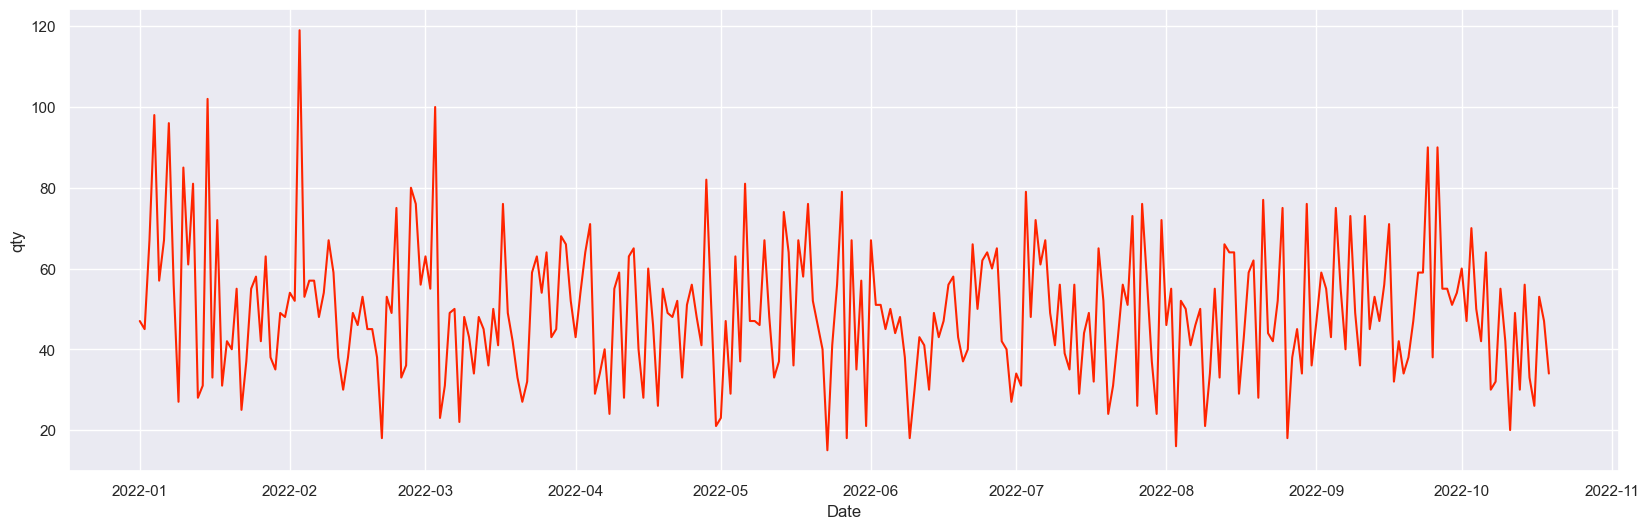

In [32]:
plt.figure(figsize=(20,6))
sns.lineplot(data=train, x=train.index, y= 'qty')

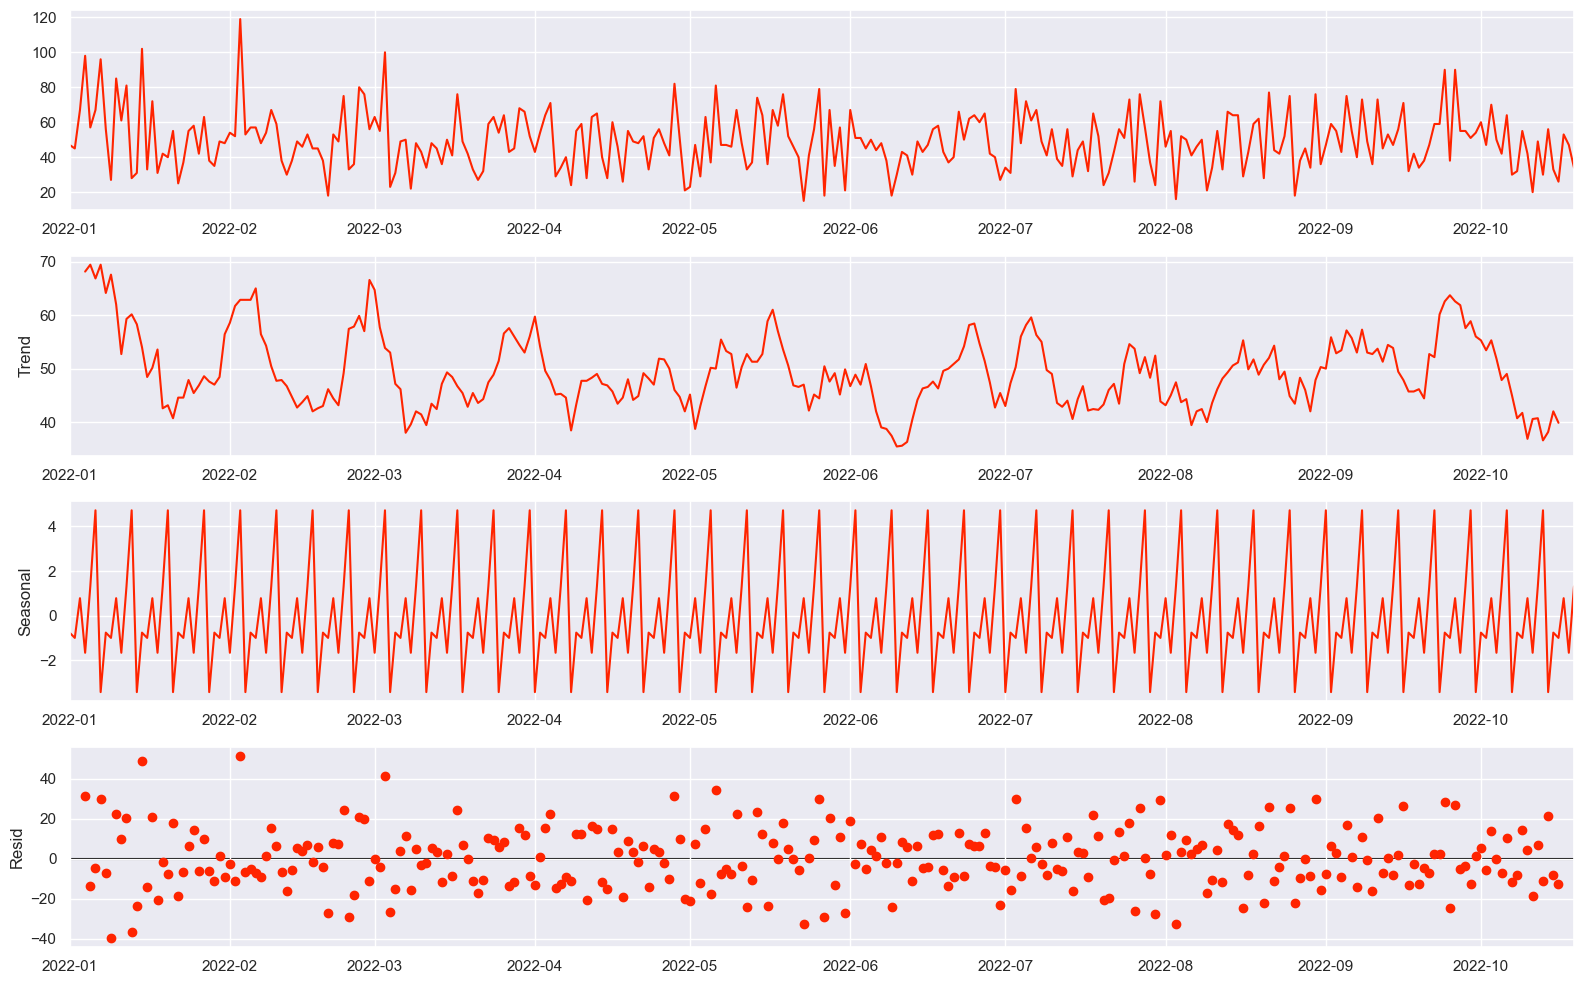

In [33]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(train, model='additive')
fig = decomposition.plot()
plt.show()

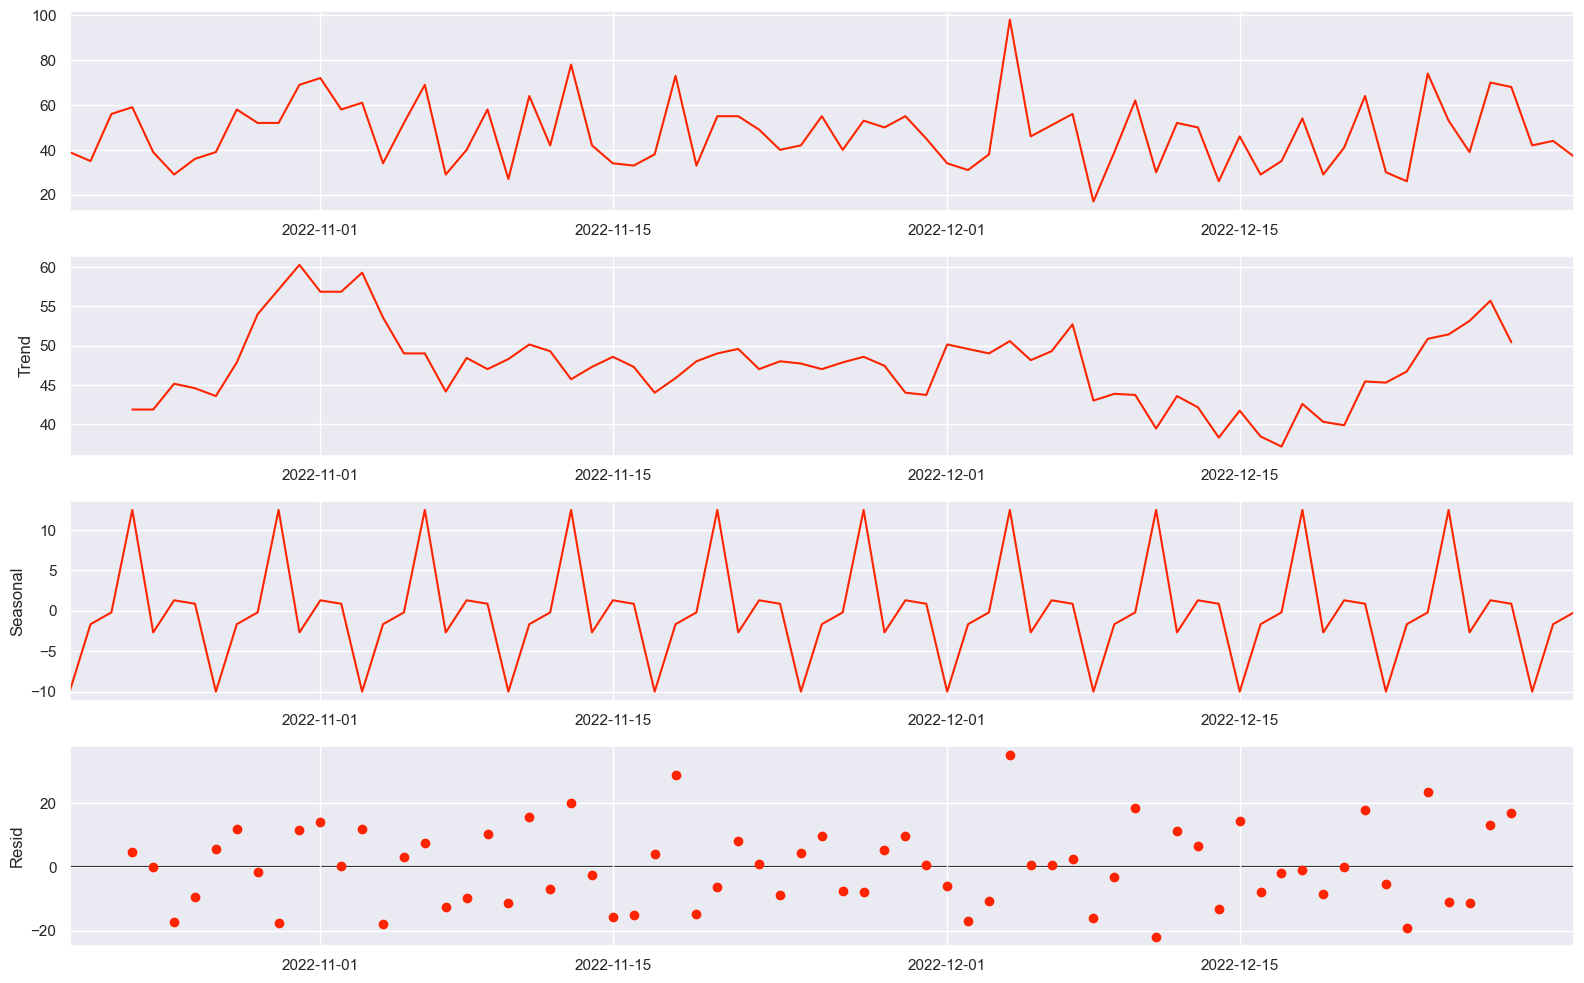

In [34]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(test, model='additive')
fig = decomposition.plot()
plt.show()

Terdapat Seasonal denggan periode 7 (Mingguan)

### Augmented Dickey-Fuller Test (ADF)
- Hipotesis nol (Ho) dari uji ADF adalah bahwa deret waktu `Tidak Stasioner`. 
- Hipotesis alternatif (H1) dari uji ADF adalah bahwa deret waktu `Stasioner`.  
- Jadi, jika nilai P-value dari ADF kurang dari tresholsd critical value (0,05). maka kita menolak hipotesis nol dan menyimpulkan bahwa deret waktu tersebut memang stasioner.

Sehingga berdasarkan uji ADF (p-value < 0.05). Maka tolak H0, sehingga data tersebut adalah Stasioner

In [35]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(train['qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -17.222033
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


## 3. Find Parameter P,D,Q
- P = 0
- Q = 0
- D = 1

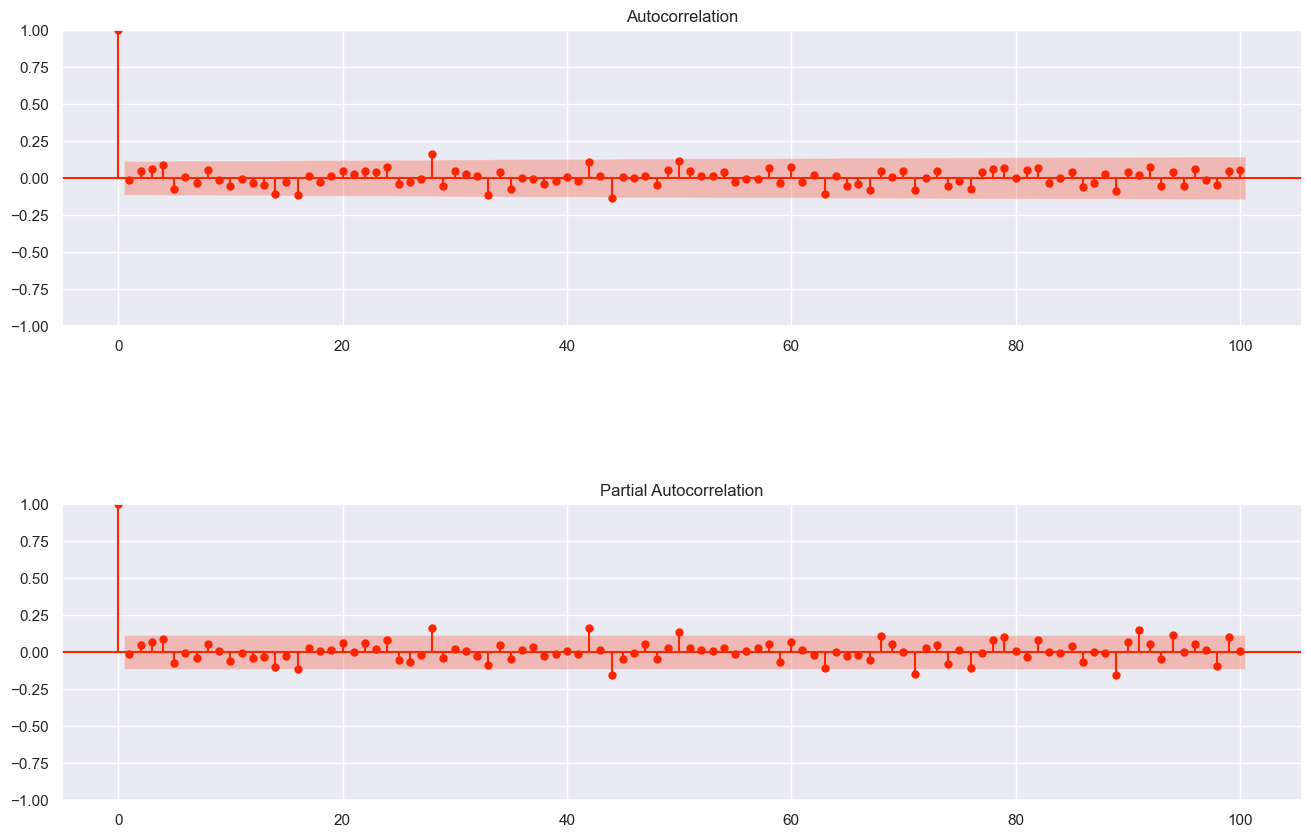

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure()
fig.subplots_adjust(hspace=0.6)
plt.subplot(2,1,1)
plot_acf(train, ax=plt.gca(), lags=100) # gca -> "GetCurrentAxis"

# Plots lags on the horizontal and the correlations on vertical axis.
plt.subplot(2,1,2)
plot_pacf(train, ax=plt.gca(), lags=100)
plt.show()

# 4. Arima Modeling

In [37]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['qty'], order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    qty   No. Observations:                  292
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1287.179
Date:                Thu, 31 Aug 2023   AIC                           2578.358
Time:                        22:11:12   BIC                           2585.704
Sample:                    01-01-2022   HQIC                          2581.301
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5286      0.048    -10.911      0.000      -0.624      -0.434
sigma2       406.4937     31.843     12.765      0.000     344.082     468.905
Ljung-Box (L1) (Q):                  10.77   Jarque-

C:\Users\jodhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jodhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jodhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [38]:
y_pred = model_fit.get_forecast(len(test))
y_pred_df = y_pred.conf_int()
y_pred_df['predict'] = model_fit.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_df

,lower qty,upper qty,predict
Date,,,
2022-10-20,1.355648,80.388021,40.871834
2022-10-21,-6.447302,80.926031,37.239365
2022-10-22,-13.649613,91.968609,39.159498
2022-10-23,-19.793438,96.082458,38.144510
2022-10-24,-25.204718,102.566789,38.681035
...,...,...,...
2022-12-27,-177.913623,254.904624,38.495501
2022-12-28,-179.452182,256.443184,38.495501
2022-12-29,-180.979956,257.970958,38.495501


<AxesSubplot:xlabel='Date', ylabel='predict'>

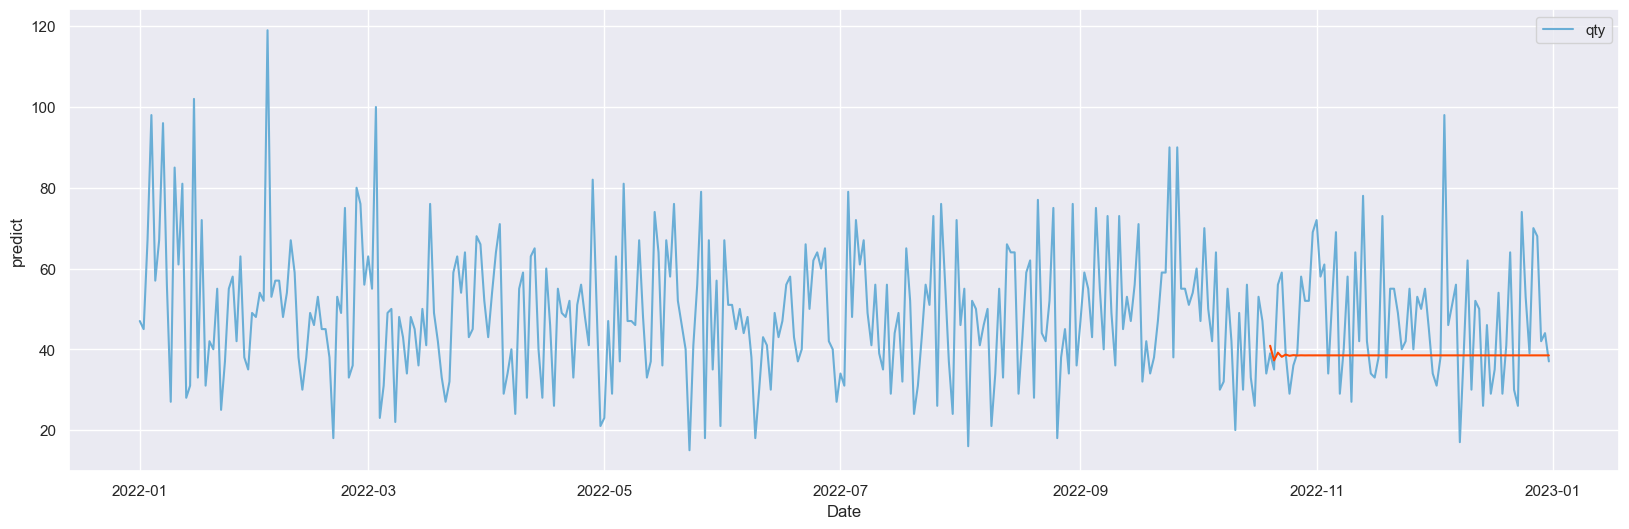

In [39]:
plt.figure(figsize = (20,6))
sns.lineplot(data=df_forecasting, palette='Blues')
sns.lineplot(data=y_pred_df['predict'], palette='Red')

# 5. Auto Modeling Arima

In [40]:
from pmdarima import auto_arima

In [41]:
arima_model = auto_arima(train, start_p=0, start_q=0,
                               max_p=10, max_q=10, m=12,
                               start_P=0, start_Q=0, seasonal=True,
                               d=0, D=1, trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2569.664, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2478.450, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2568.278, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2571.664, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2455.081, Time=0.80 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2453.090, Time=0.52 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2476.528, Time=0.27 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2455.082, Time=0.65 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2456.530, Time=1.37 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=2

In [42]:
prediction= arima_model.predict(n_periods=len(test))
prediction

2022-10-20    53.931008
2022-10-21    50.938644
2022-10-22    50.516653
2022-10-23    49.701990
2022-10-24    51.044729
                ...    
2022-12-27    43.048147
2022-12-28    55.584391
2022-12-29    49.393663
2022-12-30    45.749668
2022-12-31    52.437797
Freq: D, Length: 73, dtype: float64

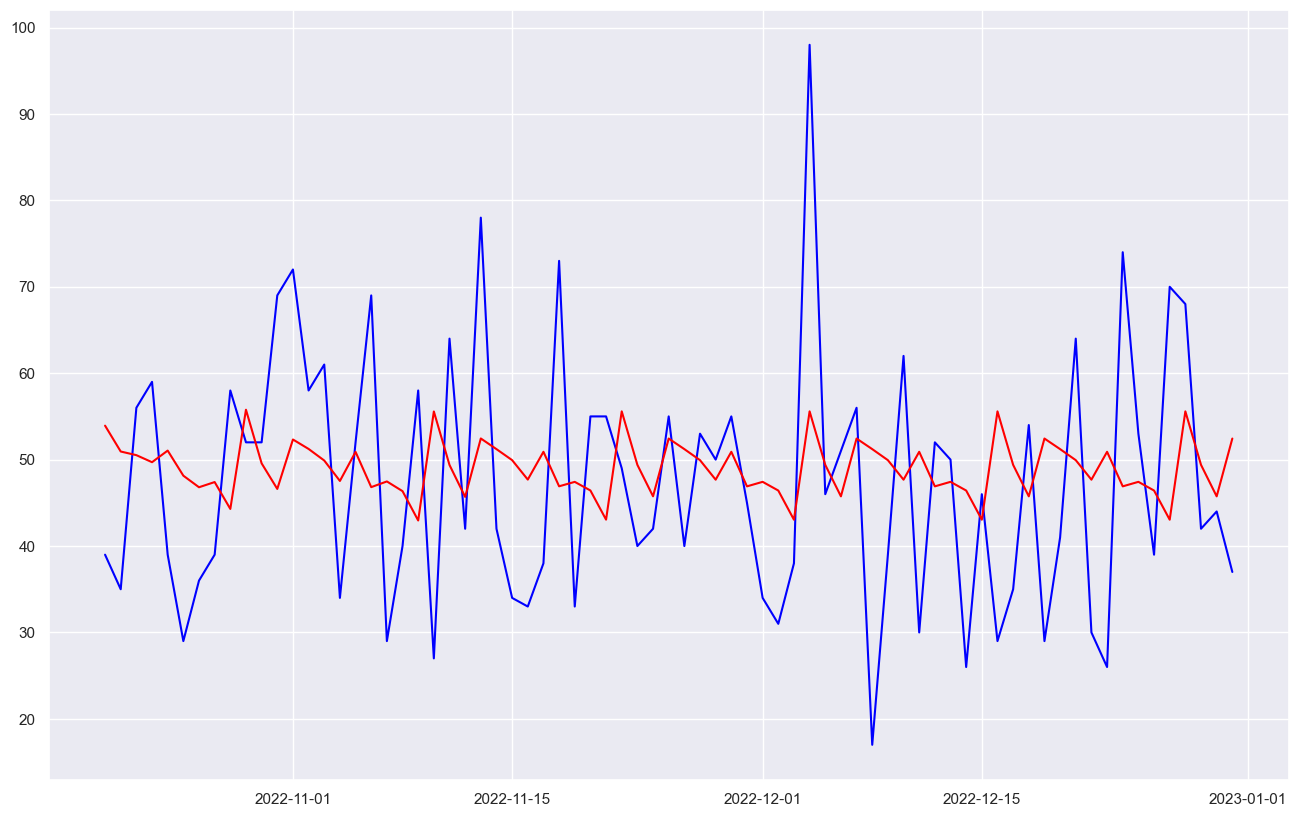

In [43]:
# plt.plot(df_forecasting, color='Black')
plt.plot(test, color='Blue')
plt.plot(prediction, color='Red')

# SEGMENTATION

<AxesSubplot:>

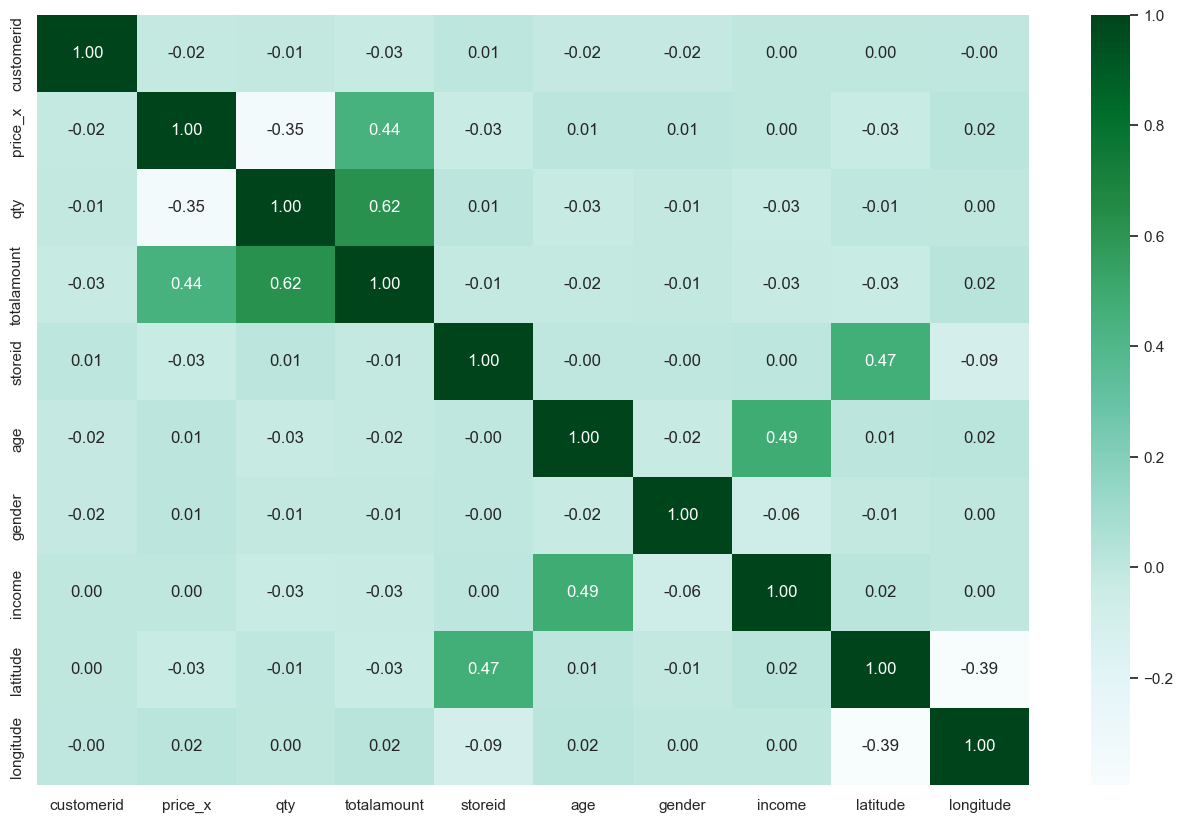

In [55]:
# Feature Selection for 
sns.heatmap(df.corr(), annot=True,fmt='.2f', cmap="BuGn")

In [135]:
df.head(2)

,transactionid,customerid,Date,productid,price_x,qty,totalamount,storeid,age,gender,Marital Status,income,Product Name,storename,groupstore,Type,latitude,longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36.0,0.0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44.0,1.0,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666


In [180]:
df_selection = df.copy()
print("Total Duplicated Customer",df_selection.duplicated(subset='customerid').sum())
# Because we want to create customers segmentation. So that duplicate customer data will be accumulated
df_selection = df_selection.groupby(['customerid']).agg({
                    'transactionid':'count',
                    'qty':'sum',
                    'totalamount':'sum',
                    'income':'mean'
                }).reset_index()
print("Total Duplicated Customer After Grouping",df_selection.duplicated(subset='customerid').sum())
df_selection.head()

Total Duplicated Customer 4461
Total Duplicated Customer After Grouping 0


,customerid,transactionid,qty,totalamount,income
0,1,17,60,623300,5.12
1,2,12,56,382300,6.23
2,3,15,56,446200,9.17
3,4,10,46,302500,4.87
4,5,7,27,268600,3.57


In [181]:
df_selection = df_selection.drop(axis=1, columns='customerid')
df_selection.columns = ['total_transaction','qty_product','total_amount','income']
df_selection.head()

,total_transaction,qty_product,total_amount,income
0,17,60,623300,5.12
1,12,56,382300,6.23
2,15,56,446200,9.17
3,10,46,302500,4.87
4,7,27,268600,3.57


## Standarization

In [189]:
from sklearn.preprocessing import MinMaxScaler
df_std = df_selection.copy()
scaler = MinMaxScaler()
df_std[df_selection.columns.values] = scaler.fit_transform(df_std)
df_std.head()

,total_transaction,qty_product,total_amount,income
0,0.777778,0.724638,0.706978,0.071809
1,0.500000,0.666667,0.390871,0.087377
2,0.666667,0.666667,0.474685,0.128612
3,0.388889,0.521739,0.286201,0.068303
4,0.222222,0.246377,0.241737,0.050070


## KMEANS CLUSTERING

In [192]:
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,9):
    kmean = KMeans(random_state=23,n_clusters = i)
    kmean.fit(df_std)
    inertia.append(kmean.inertia_)

<AxesSubplot:>

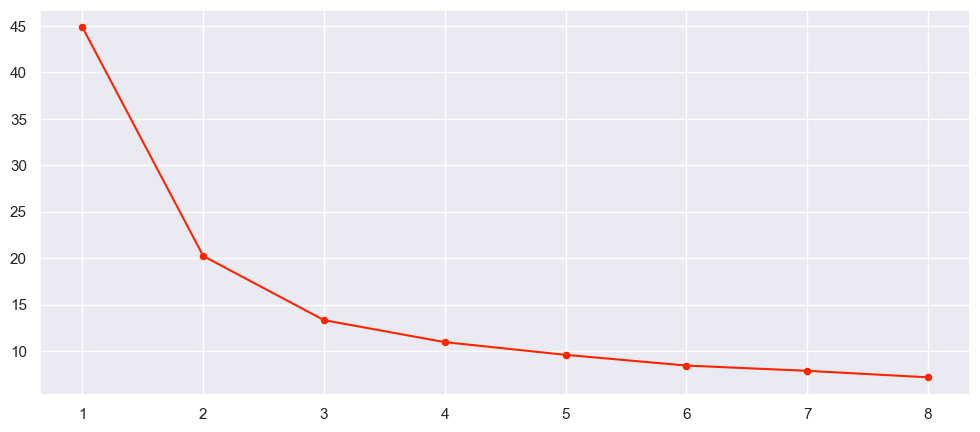

In [193]:
plt.figure(figsize=(12,5))
sns.lineplot(x=range(1,9,1), y=inertia)
sns.scatterplot(x=range(1,9,1), y=inertia)

Berdasarkan Elbow Method, jumlah cluster terbaik yaitu 3 cluster

In [205]:
kmean = KMeans(random_state=23,n_clusters = 3)
kmean.fit(df_std)
df_selection['cluster'] = kmean.labels_
df_selection.head()

,total_transaction,qty_product,total_amount,income,cluster
0,17,60,623300,5.12,1
1,12,56,382300,6.23,1
2,15,56,446200,9.17,1
3,10,46,302500,4.87,0
4,7,27,268600,3.57,2


In [229]:
summary = df_selection.groupby('cluster').agg({
        'total_transaction' : ['count','sum','mean'],
        'qty_product' :['sum','mean'] ,
        'total_amount':['sum','mean'] ,
        'income':['mean']
    }).reset_index()

In [230]:
summary.columns = ['cluster', 'total_cus', 'total_transaction','avg_transaction','total_qty','avg_qty',
                   'total_amount','avg_amount','avg_income']
summary

,cluster,total_cus,total_transaction,avg_transaction,total_qty,avg_qty,total_amount,avg_amount,avg_income
0,0,222,2367,10.662162,8494,38.261261,74507700,335620.27027,8.443739
1,1,125,1847,14.776000,6954,55.632000,63294100,506352.80000,8.536480
2,2,100,694,6.940000,2411,24.110000,20376700,203767.00000,9.055500


### Cluster Summary

1. Cluster 0: 
- Merupakan kelompok customer terbanyak. Segment Customer ini memiliki rata income terendah.
- Meskipun segment ini berpendapatan paling rendah, segment ini memiliki daya beli yang cukup tinggi.
2. Cluster 1:


3. Cluster 2:    